In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
"""

Пояснения к данных файла

1.satisfaction_level​ - Уровень удовлетворенности работой
2.Last_evaluation ​- Время с момента последней оценки в годах
3.number_projects​ - Количество проектов, выполненных за время работы
4.average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц
5.time_spend_company​ - Стаж работы в компании в годах
6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником
7.left​ - уволился ли сотрудник
8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет
9.department ​- отдел в котором работает сотрудник
10.salary​ - относительный уровень зарплаты

"""

'\n\nПояснения к данных файла\n\n1.satisfaction_level\u200b - Уровень удовлетворенности работой\n2.Last_evaluation \u200b- Время с момента последней оценки в годах\n3.number_projects\u200b - Количество проектов, выполненных за время работы\n4.average_monthly_hours\u200b - Среднее количество часов на рабочем месте в месяц\n5.time_spend_company\u200b - Стаж работы в компании в годах\n6.work_accident\u200b - Происходили ли несчастные случаи на рабочем месте с сотрудником\n7.left\u200b - уволился ли сотрудник\n8.promotion_last_5years\u200b - повышался ли сотрудник за последние пять лет\n9.department \u200b- отдел в котором работает сотрудник\n10.salary\u200b - относительный уровень зарплаты\n\n'

In [4]:
df = pd.read_csv('HR.csv')

In [135]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [9]:
# Основные статистики количественных переменных

In [10]:
basic_stat = df.describe().iloc[[1, 2, 3, 5, 7], 0:5]
basic_stat

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [11]:
# Моды количественных переменных.
# у переменной "Среднее количество часов на рабочем месте в месяц" оказалось две моды

df.mode().iloc[:, 0:5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.1,0.55,4.0,135,3.0
1,NaN,NaN,NaN,156,NaN


In [12]:
# Медианы количественных переменных

df.median().to_frame().T.iloc[:, 0:5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.64,0.72,4.0,200.0,3.0


In [13]:
#  Корреляция

In [14]:
df_qt = df.iloc[:, 0:5]

<AxesSubplot:>

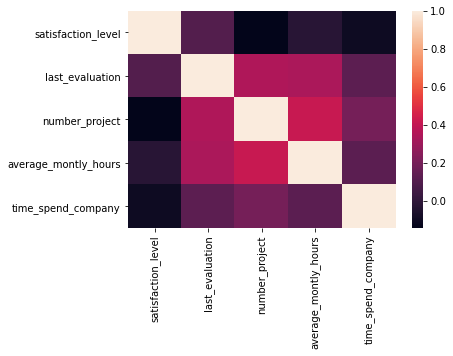

In [15]:
sns.heatmap(df_qt.corr())

<AxesSubplot:>

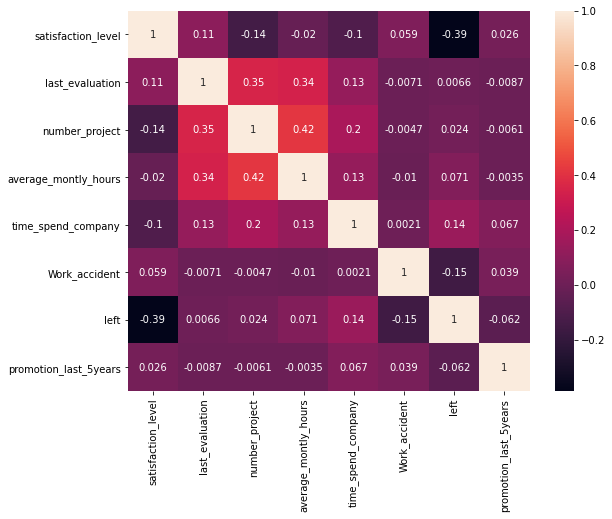

In [97]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(), annot=True)

### Вывод:
Максимально скоррелированные величины:

    Количество часов на работе в месяц и количество проектов ('number_project' и 'average_montly_hours').
    Коэффиициент корреляции Пирсона равен 0.42.
    Статус уволен/работает и уровень удовлетворенности ('satisfaction_level' и 'left').
    Коэффициент корреляции Пирсона равен -0.39.
Максимально независимые переменные.

    Повышение за последние 5 лет и количество часов на работе в месяц ('promotion_last_5years' и 'average_monthly_hours').
    Коэффициент корреляции Пирсона равен -0.0035.
    Стаж в компании и наличие несчастных случаев('time_spend_company' и 'work_accident').
    Коэффициент корреляции равен 0.0021

In [16]:
# Сотрудники

In [17]:
# Распределение сотрудников по отделам
department = df['department'].value_counts().to_frame()
department

,department
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739
management,630


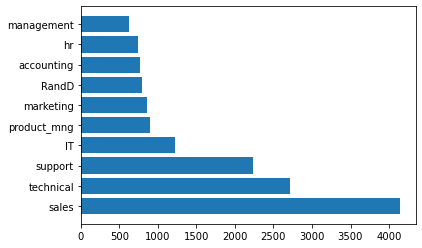

In [18]:
# Визуализация на столбчатой диаграмме

plt.barh(department.index, department.department)
plt.show()


In [19]:
# Распределение по уровням зарплаты
level_sal = df['salary'].value_counts().to_frame()
level_sal

,salary
low,7316
medium,6446
high,1237


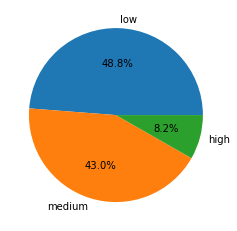

In [20]:
# Визуализация на круговой диаграмме распределение по уровням зарплаты
plt.pie(level_sal.salary,labels=level_sal.index, autopct='%1.1f%%')
plt.show()

In [21]:
depart_level_sal = df.groupby(['department', 'salary']).count().iloc[:, 0].reset_index().pivot(index='department', columns='salary', values='satisfaction_level')

<AxesSubplot:ylabel='department'>

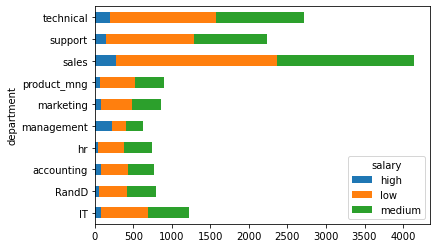

In [22]:
# Визуализация распредления сотрудников по отделам и зарплатам в виде столбчатой диаграммы
depart_level_sal.plot(kind='barh',stacked=True,rot=0)

In [23]:
# проверка гипотезы влияния зарплаты на количество часов на работе

In [24]:
df.groupby(['salary']).mean('average_montly_hours')['average_montly_hours'].to_frame()

,average_montly_hours
salary,
high,199.867421
low,200.996583
medium,201.338349


#### Вывод:
Гипотеза не подтверждается, отличие среднего времени меньше 1%. Если говорить о фактических цифрах, то люди с более высоким уровнем зарплаты проводят в среднем в месяц на 1 час меньше времени на рабочем месте. 
Возможно, это как-то зависит от отдела, где сотрудник работает. Проверим это далее.


In [61]:
how_many_hours = df.groupby(['department', 'salary']).mean('average_montly_hours')['average_montly_hours'].reset_index().pivot(index='department', columns='salary', values='average_montly_hours')

<AxesSubplot:ylabel='department'>

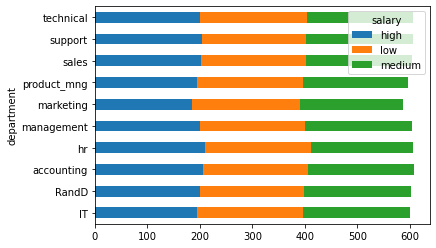

In [62]:
how_many_hours.plot(kind='barh',stacked=True,rot=0)

In [66]:
test = pd.DataFrame()
test['pct_1'] = 100*(how_many_hours['high']- how_many_hours['low'])/how_many_hours['low']
test['pct_2'] = 100*(how_many_hours['high']- how_many_hours['medium'])/how_many_hours['medium']

test

# Сравним конкретные цифры: pct_1 - различие в процентах времени нахождения на рабочем месте высокого уровня зарплат от низкого, 
# pct_2 - различие в процентах времени нахождения на рабочем месте высокого уровня зарплат от среднего. 
# Выделяется отдел маркетинга и HR. Отдел маркетинга высокий уровень зарплат на рабочем месте проводит на 9% времени меньше,
# чем низкий, и на 5,7% меньше, чем средний. HR - наоборот, на 3% больше времени на рабочем месте, счем низкий уровень зарплат, 
# и на 7,8% больше, чем средний. Бухгалтерия и отдел поддержки также: высокий уровень зарплат проводит на рабочем месте больше времени,
# чем низкий и средний, отличие составляет 2-3 процента. А IT и продакт менеджер соответвенно наоборот - меньше, с отличием в 2-4%.
# В среднем получается, что отличие по всем отделам нивелируется и мы получаем среднюю цифру в 0,5%.

,pct_1,pct_2
department,,
IT,-3.205284,-4.585331
RandD,0.502067,-1.581244
accounting,3.004493,2.203717
hr,3.264871,7.842196
management,-0.246859,-1.186482
marketing,-9.248759,-5.737136
product_mng,-3.191478,-2.506910
sales,0.406966,-0.169649
support,2.556701,0.716313


#### Вывод: 
В отдельно взятых отделах есть отличие проводимого времени на работе у сострудников высшего звена по сравнению с иными, однако оно может быть как в меньшую, так и в большую сторону.

In [27]:
# Показатели уволившихся и работающих сотрудников

In [51]:
# Повышения в поледние пять лет

pct_left = 100*df[df['left'] == 1].promotion_last_5years.value_counts()[1]/df[df['left'] == 1].promotion_last_5years.value_counts()[0]
pct_work = 100*df[df['left'] == 0].promotion_last_5years.value_counts()[1]/df[df['left'] == 0].promotion_last_5years.value_counts()[0]

print('Доля уволившихся сотрудников с повышением в течении последних 5 лет ', round(pct_left, 2), '%', 
      '\nДоля работающих сотрудников с повышением в течении последних 5 лет ', round(pct_work, 2), '%')

Доля уволившихся сотрудников с повышением в течении последних 5 лет  0.53 % 
Доля работающих сотрудников с повышением в течении последних 5 лет  2.7 %


In [53]:
# Средняя степень удовлетворенности

mean_happy_left = df[df['left'] == 1].satisfaction_level.mean()
mean_happy_work =df[df['left'] == 0].satisfaction_level.mean()

print('Средняя степень удовлетворенности уволившихся сотрудников ', round(mean_happy_left, 3), 
      '\nСредняя степень удовлетворенности работающих сотрудников ', round(mean_happy_work, 3))

Средняя степень удовлетворенности уволившихся сотрудников  0.44 
Средняя степень удовлетворенности работающих сотрудников  0.667


In [54]:
# Среднее количество проектов

count_pjct_left = df[df['left'] == 1].number_project.mean()
count_pjct_work = df[df['left'] == 0].number_project.mean()

print('Среднее количество проектов уволившихся сотрудников ', round(count_pjct_left, 2), 
      '\nСреднее количество проектов работающих сотрудников ', round(count_pjct_work, 2))

Среднее количество проектов уволившихся сотрудников  3.86 
Среднее количество проектов работающих сотрудников  3.79


In [67]:
# LDA - модель

In [68]:
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]

In [69]:
y = df['left']

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

In [126]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [127]:
lda = LinearDiscriminantAnalysis()

In [175]:
# Тренируем модель
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [178]:
result = pd.DataFrame([np.array(y_test), lda.predict(X_test)]).T
result.head(10)

,0,1
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,0
9,0,0


In [177]:
# Точность модели
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7588